<a href="https://colab.research.google.com/github/ruhullahil/gcolab/blob/master/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np



In [0]:
#g = pd.read_csv(filename, sep=';').groupby('')
#d = {g:x for g,x in pd.DataFrame.groupby('The_evil_column')}
wine=pd.read_csv('winequality-red.csv',delimiter=';')

wine.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [0]:
data = wine.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 1599
Number of attributes = 12
Number of missing values:
	fixed acidity: 0
	volatile acidity: 0
	citric acid: 0
	residual sugar: 0
	chlorides: 0
	free sulfur dioxide: 0
	total sulfur dioxide: 0
	density: 0
	pH: 0
	sulphates: 0
	alcohol: 0
	quality: 0


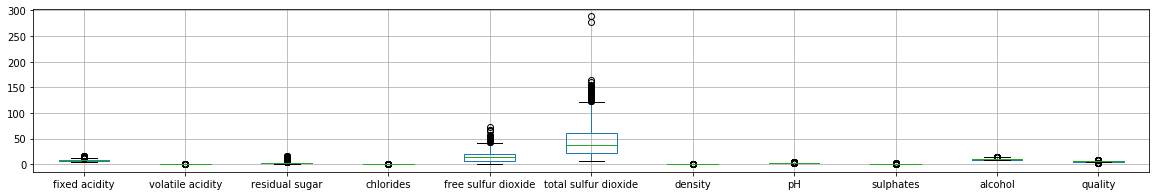

In [0]:
 %matplotlib inline
data2 = data.drop(['citric acid'],axis=1)
data2['alcohol'] = pd.to_numeric(data2['alcohol'])
data2.boxplot(figsize=(20,3))








In [0]:
Z = (data2-data2.mean())/data2.std()
Z[20:40]


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
20,0.333332,-1.719094,-0.524002,-0.222383,1.254769,0.411372,0.028252,0.510970,-0.756009,-0.959946,0.450707
21,-0.413324,-0.769690,-0.169374,-0.116148,0.681164,0.745766,0.770039,1.353012,-0.048074,-0.678432,-0.787576
22,-0.241019,-0.546301,-0.665853,0.393782,-0.561648,-0.287816,-0.077718,-0.914026,1.485786,-0.866108,-0.787576
23,0.103591,-0.211217,-0.169374,-0.073654,-0.657248,0.624168,0.028252,-0.914026,-0.756009,-0.959946,-0.787576
24,-0.815370,-0.713843,-0.098449,-0.052407,0.489962,-0.196617,0.028252,0.770060,-0.166063,-0.678432,0.450707
25,-1.159980,-0.769690,-0.807705,-0.158642,-0.466047,-0.713408,-0.660550,0.187107,-0.579025,-1.053784,-0.787576
26,-0.413324,-0.657996,-0.524002,-0.158642,-1.135253,-1.078202,-0.289657,-0.201528,-0.402042,-0.866108,-0.787576
27,-0.241019,-0.546301,-0.665853,0.393782,-0.561648,-0.287816,-0.077718,-0.914026,1.485786,-0.866108,-0.787576
28,-0.700500,1.017423,-0.453077,-0.158642,-0.179244,-0.348615,0.240191,1.029150,-0.638020,-0.959946,-0.787576
29,-0.298454,0.654416,-0.382151,-0.116148,-0.752849,-0.926204,-0.183687,0.446197,-0.402042,-0.584594,0.450707


In [0]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z >-.1).sum(axis=1)==9) & ((Z <=1).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 1599
Number of rows after discarding missing values = 11


Text(0.5, 1.0, 'Aggrigation (variance = 0.0238)')

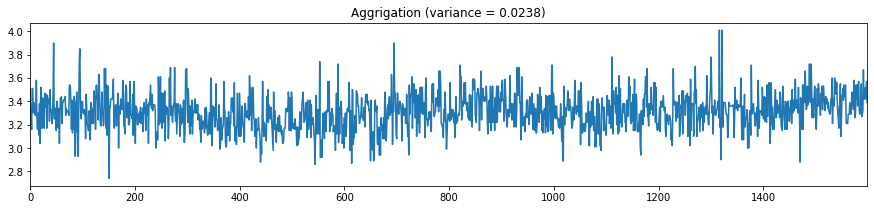

In [0]:
#data3.index = pd.to_numeric(data2['chlorides'])
data3 = data2['pH']
ax = data3.plot(kind='line',figsize=(15,3))
ax.set_title('Aggrigation (variance = %.4f)' % (data3.var()))


In [0]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
235,7.2,0.630,0.00,1.90,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
1096,6.6,0.725,0.09,5.50,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6
905,9.2,0.580,0.20,3.00,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5
715,7.2,0.490,0.18,2.70,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,6
847,7.4,0.680,0.16,1.80,0.078,12.0,39.0,0.99770,3.50,0.70,9.9,6
960,8.5,0.470,0.27,1.90,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
129,6.1,0.380,0.15,1.80,0.072,6.0,19.0,0.99550,3.42,0.57,9.4,5
749,7.3,0.510,0.18,2.10,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6
